In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [78]:
#Let's see how out dataset looks like
df = pd.read_csv("Speed Dating Data.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', 1000)
print(df.shape)
display(df.head())

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [79]:
# there's more than one iid -- create a new dataset that contains each person only one time
df2 = df.copy()
df2 = df2.drop_duplicates(subset = "iid")
display(df2.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.

1    277
0    274
Name: gender, dtype: int64


<ipython-input-80-ff30f4fc3ccf>:13: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



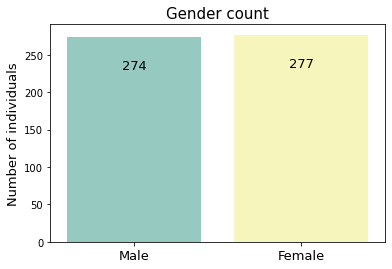

In [80]:
# Gender count 

print(df2['gender'].value_counts())
gender_chart = df2['gender'].value_counts()
gender_count = sns.countplot(data = df2, x = 'gender', palette = "Set3")
gender_count.set_xticklabels(["Male", "Female"], fontsize=13)

#plt.box(False)
plt.xlabel("")
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Gender count', fontsize=15)
for p in gender_count.patches:
    gender_count.annotate(s = p.get_height(), xy = (p.get_x()+0.4, p.get_height()-30), ha='center', va='top', color='black', size=13)

plt.savefig('Gender count.png', dpi = 300)


mean age of participants: 26.4
median age of participants: 26.0
mean age by gender:
gender
0    26.126394
1    26.587591
Name: age, dtype: float64


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



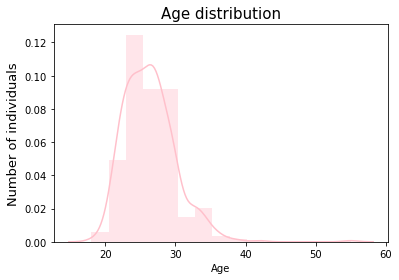

In [81]:
# Mean age of participants
print('mean age of participants:', round(df2.loc[:, 'age'].mean(), 1))
print('median age of participants:', round(df2.loc[:, 'age'].median(), 1))

# mean age by gender
print("mean age by gender:")
print(df2.groupby("gender")['age'].mean())

# age distribution
age_distrib = sns.distplot(df2['age'], kde = True, bins = 15, color = "pink") #aspect = 1)
plt.xlabel("Age")
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Age distribution', fontsize=15)
plt.savefig('Age distrib.png', dpi = 300)

2.0    304
4.0    136
3.0     42
6.0     37
1.0     26
Name: race, dtype: int64
The ethnicities that are the most represented are European/Caucasian-American and Asian/Pacific Islander/Asian-American


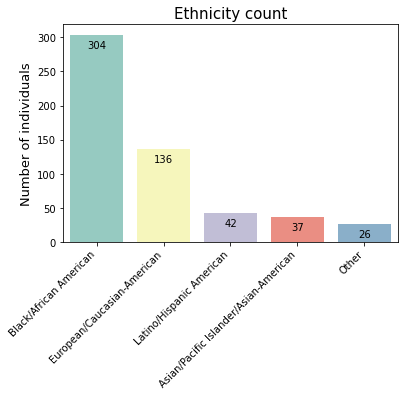

In [82]:
# Ethnicity distribution
print(df2['race'].value_counts().sort_values(ascending = False))
ethn_distrib = sns.countplot(data = df2, x = 'race', palette = "Set3", order = df2['race'].value_counts().index)
ethn_distrib.set_xticklabels(["Black/African American", "European/Caucasian-American", "Latino/Hispanic American", "Asian/Pacific Islander/Asian-American", "Other"], 
                             fontsize=10, rotation = 45, ha = "right")
#plt.box(False)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Ethnicity count', fontsize=15)
for p in ethn_distrib.patches:
    ethn_distrib.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()-15), ha='center', va='center', color='black', size=10)
print("The ethnicities that are the most represented are European/Caucasian-American and Asian/Pacific Islander/Asian-American")
plt.show()

Is ethncity important? (mean and median by gender)
gender
0    4.1
1    3.4
Name: imprace, dtype: float64
gender
0    3.0
1    3.0
Name: imprace, dtype: float64
Is religion important? (mean and median by gender)
gender
0    4.1
1    3.0
Name: imprelig, dtype: float64
gender
0    3.0
1    2.0
Name: imprelig, dtype: float64


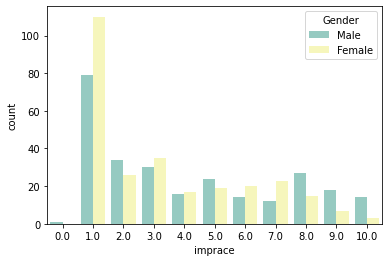

In [83]:
# Importance that the other person is of the same ethnicity 
print('Is ethncity important? (mean and median by gender)')
print(round(df2.groupby("gender")['imprace'].mean(), 1))
print(round(df2.groupby("gender")['imprace'].median(), 1))

# Importance of the same religion
print('Is religion important? (mean and median by gender)')
print(round(df2.groupby("gender")['imprelig'].mean(), 1))
print(round(df2.groupby("gender")['imprelig'].median(), 1))

imprace = sns.countplot(data = df2, x = 'imprace', hue = 'gender', palette = "Set3")
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()

1.0    228
2.0    189
3.0     40
5.0     35
6.0     30
4.0     22
Name: goal, dtype: int64

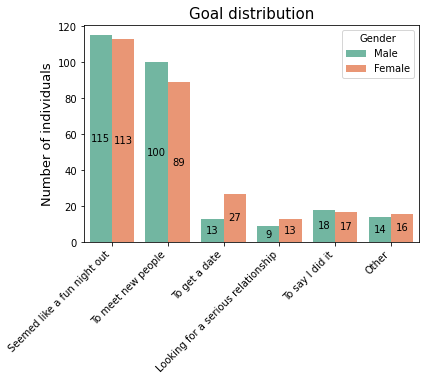

In [84]:
# What are the goals of participants? 
display(df2['goal'].value_counts())

# Goal distribution
goal_distr = sns.countplot(data = df2, x = 'goal', palette = "Set2", hue = 'gender')
goal_distr.set_xticklabels(["Seemed like a fun night out", "To meet new people", "To get a date", "Looking for a serious relationship", "To say I did it", "Other"
                            ], fontsize=10, rotation = 45, ha = "right")

plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Goal distribution', fontsize=15)
for p in goal_distr.patches:
    goal_distr.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()/2), ha='center', va='center', color='black', size=10)

In [85]:
# what are participants looking for in a partner
# let's drop the waves 6 to 9 because the notation was different 

df3 = df2.copy()
df3 = df3.drop(df3[(df3['wave'] >= 6) & (df3['wave'] <= 9)].index)

    Attractive  Sincere  Intelligent   Fun  Ambitious  Shared interests
0         15.0     20.0         20.0  15.0       15.0              15.0
10        45.0      5.0         25.0  20.0        0.0               5.0
20        35.0     10.0         35.0  10.0       10.0               0.0
30        20.0     20.0         20.0  20.0       10.0              10.0
40        20.0      5.0         25.0  25.0       10.0              15.0
Index(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious',
       'Shared interests'],
      dtype='object')


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-2933dfbda58b>:21: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



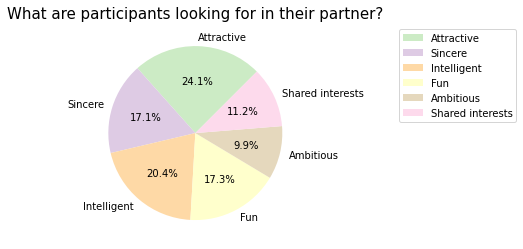

In [86]:
# how much importance is given to some attributes? 
df4 = df3[['attr1_1', "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]]

# Pie chart of what people are looking for in their partner
df4.rename(columns = {'attr1_1':'Attractive', "sinc1_1" : 'Sincere', "intel1_1" : "Intelligent", "fun1_1" : "Fun", 
                      "amb1_1" : "Ambitious", "shar1_1" : "Shared interests" }, inplace = True) 
print(df4.head())

names = df4.columns
print(names)

n = 1
lst = []
for i in df4.columns:
    lst.append(n+1)
    n +=1
cmap = plt.get_cmap('Pastel1')
colors = cmap(lst)

pie_chart = plt.pie(x = df4.mean(), labels = df4.columns, autopct='%1.1f%%', colors=colors, shadow=False, startangle = 45)
plt.legend(pie_chart, labels = df4.columns, bbox_to_anchor=(2, 1))
plt.title("What are participants looking for in their partner?", fontsize = 15)
plt.show()

Index(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious',
       'Shared interests'],
      dtype='object')


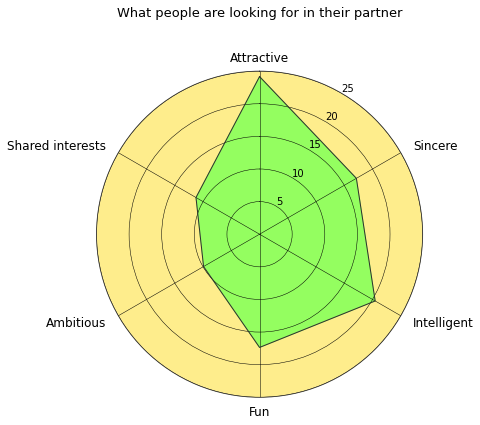

In [87]:
# Anouther way to visualize what attributes are the most important in their partner for the participants  
# build a radar chart -- from https://www.pythoncharts.com/2019/04/16/radar-charts/
# Each attribute we'll plot in the radar chart.
labels = df4.columns
print(labels)
values = [df4[i].mean() for i in df4]

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# The plot is a circle, so we need to "complete the loop and append the start value to the end.
values2 = values + values[:1]
angles2 = angles + angles[:1]

# Draw the outline of our data.
ax.plot(angles2, values2, color='#30302F', linewidth=1)
# Fill it in.
ax.fill(angles2, values2, color='#94FE60') #alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 25)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#000000', labelsize = 12)
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=10)
# Change the color of the circular gridlines.
ax.grid(color='#000000', linewidth = 0.5)
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#30302F')
# Change the background color inside the circle itself.
ax.set_facecolor('#FEED8C')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
ax.set_title('What people are looking for in their partner', y=1.15, fontsize = 13)
plt.savefig('radar chart - what are looking for.png', dpi = 300)

    attr4_1  sinc4_1  intel4_1  fun4_1  amb4_1  shar4_1
0       NaN      NaN       NaN     NaN     NaN      NaN
10      NaN      NaN       NaN     NaN     NaN      NaN
20      NaN      NaN       NaN     NaN     NaN      NaN
30      NaN      NaN       NaN     NaN     NaN      NaN
40      NaN      NaN       NaN     NaN     NaN      NaN


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-ac6e8b45a225>:14: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



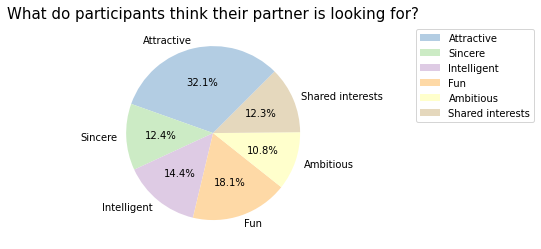

In [88]:
# Pie chart of what people think the others are looking in their partner

df5 = df3[['attr4_1', "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]]
print(df5.head())
df5.rename(columns = {'attr4_1':'Attractive', "sinc4_1" : 'Sincere', "intel4_1" : "Intelligent", "fun4_1" : "Fun", 
                      "amb4_1" : "Ambitious", "shar4_1" : "Shared interests" }, inplace = True) 


cmap = plt.get_cmap('Pastel1')
lst = [x+1 for x in range(len(df5.columns))]
colors = cmap(lst)

pie_chart = plt.pie(x = df5.mean(), labels = df5.columns, autopct='%1.1f%%', colors=colors, shadow=False, startangle = 45)
plt.legend(pie_chart, labels = df5.columns, bbox_to_anchor=(2, 1))
plt.title("What do participants think their partner is looking for?", fontsize = 15)
plt.show()


0    468
1     83
Name: match, dtype: int64


<ipython-input-89-036c1ba3b054>:10: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



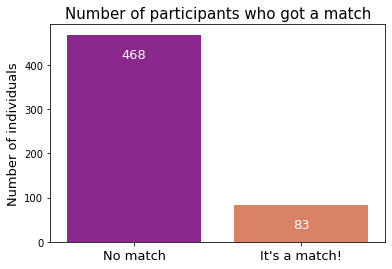

In [89]:
# How many participants got a match?
print(df2['match'].value_counts())
match_count = sns.countplot(data = df2, x = 'match', palette = "plasma")
match_count.set_xticklabels(["No match", "It's a match!"], fontsize=13)
#plt.box(False)
plt.xlabel("")
plt.ylabel('Number of individuals',fontsize=13)
plt.title('Number of participants who got a match', fontsize=15)
for p in match_count.patches:
    match_count.annotate(s = p.get_height(), xy = (p.get_x()+0.4, p.get_height()-30), ha='center', va='top', color='white', size=13)

plt.savefig('Match count.png', dpi = 300)

In [93]:
# Are participant satisfied of their experience? 
df_satisf = df.copy()

# satisfaction without NaN
print('How many NaN are there in the column?')
print(pd.isna(df_satisf['satis_2']).sum())
df_satisf = df_satisf.dropna(subset = ["satis_2"])

df_satisf["Satisfaction"] = ""
df_satisf["Satisfaction"] = df_satisf["satis_2"].apply(lambda x: "Very dissatisfied" if x == 1.0 or x == 2.0
                                                  else "Dissatisfied " if x == 3 or x == 4
                                                  else "Neutral" if x == 5.0 or x == 6.0
                                                  else 'Satisfied' if x == 7 or x == 8
                                                  else 'Very satisfied'
                                                  )

print(df_satisf["Satisfaction"].value_counts())




How many NaN are there in the column?
915
Neutral              3158
Satisfied            2277
Dissatisfied         1242
Very dissatisfied     485
Very satisfied        301
Name: Satisfaction, dtype: int64


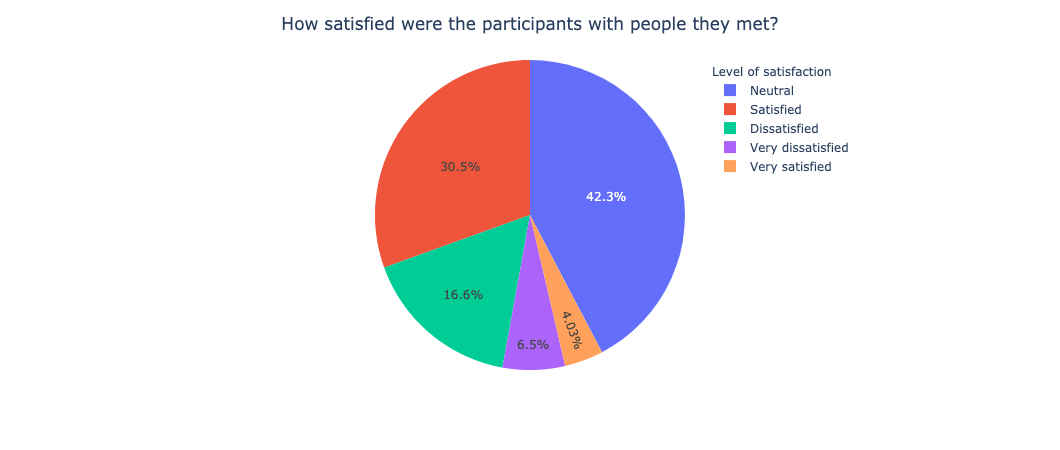

In [96]:
# pie chart of satisfaction using plotly without NaN

chart_data = df_satisf["Satisfaction"].value_counts()
fig = px.pie(values = chart_data.values, names = chart_data.index)
fig.update_layout(legend=dict({'traceorder': 'grouped'}),
                                   legend_title_text='Level of satisfaction',
                 )

fig.update_layout(
    legend = go.layout.Legend(x = 0.7,
        title = go.layout.legend.Title(text = "Level of satisfaction"))
)

fig.update_layout(
    title = go.layout.Title(text = "How satisfied were the participants with people they met?", x = 0.5)
)
fig.update_layout(
    yaxis = go.layout.YAxis(categoryorder = 'category ascending')
)

fig.show()
